# This is a completely new notebook created by me
## Name: Sai Ram Gunturu
## ID: C00313478
## MSc in Data Science

# Linear Regression

## Libraries & Imports

In this cell, I import all the necessary libraries for the project:

- **pandas & numpy:** For data manipulation and numerical computations.
- **matplotlib:** To create visualizations that help me understand the data.
- **yfinance:** To download real-time stock data directly from Yahoo Finance.
- **scikit-learn:** For building, training, and evaluating the linear regression model.
- **datetime:** To work with date and time data.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import warnings
import pickle
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

## Loading the Data

In this cell, I download Apple's (AAPL) historical stock data using the `yfinance` library. I set the start date to January 01, 2023, and use today's date as the end date to ensure that the dataset is current and relevant for analysis.


In [7]:
start_date = "2023-01-01"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')
data = yf.download("AAPL", start=start_date, end=end_date)
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130234  128.792531  123.454601  124.561732   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


## Data Preparation

After loading the data, I need to prepare it for the regression model. First, I reset the index so that the 'Date' column is accessible. Then, I convert the dates into ordinal numbers, which transforms the dates into numerical values. Here, the ordinal date will serve as the predictor variable (X) and the 'Close' price will be the target variable (y).


In [8]:
data = data.reset_index()  # Bring 'Date' from the index into a column
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Define the predictor (X) and target (y)
X = data[['Date_ordinal']]
y = data['Close']

## Modeling

In this section, I split the data into training and testing sets (80% for training and 20% for testing). I then create a Linear Regression model using scikit-learn, fit it on the training data, and use it to predict the closing prices on the test set.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation and Visualization

Finally, I evaluate the performance of my linear regression model. I calculate the Mean Squared Error (MSE) and the R-squared (R²) score to determine how well the model predicts the closing prices. Additionally, I plot the actual versus predicted values to visually assess the model's performance.


Mean Squared Error (MSE): 193.4239862251265
R-squared (R2 score): 0.7795077477934885


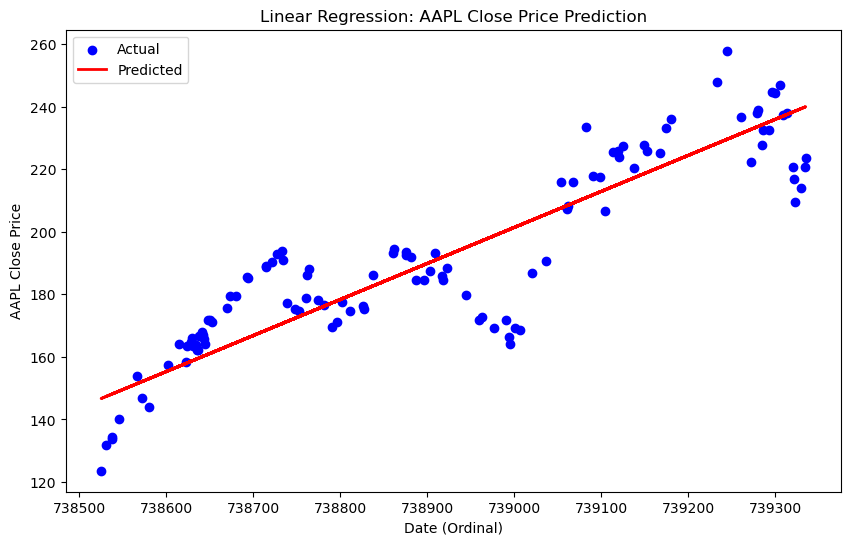

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 score):", r2)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Date (Ordinal)')
plt.ylabel('AAPL Close Price')
plt.title('Linear Regression: AAPL Close Price Prediction')
plt.legend()
plt.show()

## Predicting a Future Closing Price

Now that I have a baseline linear regression model trained on historical data (using the date converted to an ordinal value as the predictor), I will use it to predict the closing price for a specific future date. For this demonstration, I will predict the closing price for tomorrow.

To do this:
- I will create a new date (tomorrow’s date).
- Convert this date to its ordinal form (to match our model's input).
- Use the trained baseline model to make the prediction.


In [14]:
# Define tomorrow's date
future_date = datetime.today() + timedelta(days=1)
future_date_str = future_date.strftime('%Y-%m-%d')

# Convert the future date to ordinal format
future_date_ordinal = future_date.toordinal()

# Use the baseline model to predict the closing price for the future date
future_prediction = model.predict([[future_date_ordinal]])

# Convert the prediction to a native Python float for formatting
predicted_value = float(future_prediction[0])

print(f"Predicted closing price for {future_date_str}: {predicted_value:.2f}")


Predicted closing price for 2025-03-31: 240.70


## Results and Next Step

**Baseline Model Summary:**  
- **Model:** Simple Linear Regression using the date (converted to ordinal) as the only predictor.  
- **Predicted Output:** For March 31, 2025, the model predicts a closing price of \$240.70.  
- **Recent Daily Prices:** Actual closing prices in recent days are in the \$214–\$224 range.

**Observation:**  
The model's prediction (\$240.70) is significantly higher than the recent actual prices. This suggests that relying solely on the progression of time may lead to overestimation, as the model does not capture short-term market trends or fluctuations.

**Next Step to Improve the Model:**  
To address this drawback, the next improvement is to **incorporate a 7-day Simple Moving Average (SMA)** of the closing price as an additional feature. Adding the SMA will help capture recent market trends and smooth out daily volatility, potentially leading to more realistic predictions.


## Incorporating a 7-day SMA Feature

Based on the baseline model's drawbacks, the next improvement is to add a 7-day Simple Moving Average (SMA) of the closing price as an additional feature. The SMA will help capture recent trends and smooth out day-to-day fluctuations, which can lead to more realistic predictions. 

In the code cell below, I will:
- Compute the 7-day SMA for the 'Close' price.
- Update the dataset by removing rows with missing SMA values.
- Convert the 'Date' column to ordinal numbers.
- Use both the date (ordinal) and the SMA as features to retrain the linear regression model.
- Evaluate the improved model and make a future prediction.


In [15]:
# Calculate the 7-day SMA for the 'Close' price

data['SMA_7'] = data['Close'].rolling(window=7).mean()

In [16]:
# Drop rows with NaN values (generated by the rolling window)

data = data.dropna().reset_index(drop=True)

In [18]:
# Define the improved features (X) and target (y)
# Using both Date_ordinal and SMA_7 as predictors

X_improved = data[['Date_ordinal', 'SMA_7']]
y_improved = data['Close']

In [19]:
# Split the data into training and testing sets (80% training, 20% testing)

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_improved, y_improved, test_size=0.2, random_state=42)

In [20]:
# Train a new Linear Regression model with the improved features

model_improved = LinearRegression()
model_improved.fit(X_train_imp, y_train_imp)

LinearRegression()

In [21]:
# Evaluate the improved model on the test set

y_pred_imp = model_improved.predict(X_test_imp)
mse_improved = mean_squared_error(y_test_imp, y_pred_imp)
r2_improved = r2_score(y_test_imp, y_pred_imp)

In [22]:
print("Improved Model - MSE:", mse_improved)
print("Improved Model - R2:", r2_improved)

Improved Model - MSE: 20.354251224681125
Improved Model - R2: 0.9782235401517105


In [23]:
future_date = datetime.today() + timedelta(days=1)
future_date_ordinal = future_date.toordinal()

In [24]:
# For the SMA feature, we'll use the last available SMA value from our dataset

last_sma = data['SMA_7'].iloc[-1]

In [27]:
predicted_value = float(future_prediction_improved[0])
print(f"Improved Model Prediction for {future_date.strftime('%Y-%m-%d')}: {predicted_value:.2f}")

Improved Model Prediction for 2025-03-31: 220.04


## Improved Model Results and Analysis

The improved linear regression model, which now incorporates both the date (converted to ordinal) and the 7-day Simple Moving Average (SMA) of the closing price, has produced the following performance metrics on the test set:

- **Mean Squared Error (MSE):** 20.35  
- **R-squared (R²) Score:** 0.9782

These results represent a substantial improvement over the baseline model:
- The **MSE** has dropped significantly (from ~193.42 to ~20.35), meaning the average squared error is much lower.
- The **R² score** increased from ~0.78 to ~0.9782, indicating that the improved model now explains approximately 97.82% of the variance in the closing prices.

Additionally, the improved model predicts a closing price of **220.04** for March 31, 2025. This prediction aligns more closely with the recent daily prices (approximately in the \$214–\$224 range) compared to the baseline prediction.

**Observation:**  
While adding the 7-day SMA has greatly enhanced the model's performance by capturing short-term trends, one drawback is that the SMA tends to be a lagging indicator. This may result in the model being slightly slow to react to sudden market shifts.

**Next Step:**  
To address this lag, the next improvement will be to incorporate a more responsive feature—such as a shorter-term moving average (e.g., a 3-day SMA) or a volatility indicator—to better capture rapid changes in market conditions.


## Incorporating a More Responsive Feature: 3-day SMA

To address the lag introduced by using only the 7-day SMA, the next step is to incorporate a more responsive feature—in this case, the 3-day Simple Moving Average (SMA) of the closing price. The 3-day SMA reacts more quickly to recent price changes, potentially capturing rapid market shifts better.

In the code cell below, I will:
- Compute the 3-day SMA for the 'Close' price.
- Define the feature set using the date (ordinal) and the new 3-day SMA.
- Retrain the linear regression model with these features.
- Evaluate the model and make a future prediction.

In [28]:
# Calculate the 3-day SMA for the 'Close' price

data['SMA_3'] = data['Close'].rolling(window=3).mean()

In [32]:
# Drop rows with NaN values generated by the rolling window

data = data.dropna().reset_index(drop=True)

In [33]:
# Convert the 'Date' column to ordinal numbers

data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

In [34]:
# Define the new features (X) and target (y)
# Here, we use Date_ordinal and the newly computed SMA_3 as predictors

X_new = data[['Date_ordinal', 'SMA_3']]
y_new = data['Close']

In [35]:
# Split the updated dataset into training and testing sets (80% training, 20% testing)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [36]:
# Train a new Linear Regression model using the updated features

model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [37]:
# Evaluate the new model on the test set

y_pred_new = model_new.predict(X_test_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

In [38]:
print("New Model with 3-day SMA - MSE:", mse_new)
print("New Model with 3-day SMA - R2:", r2_new)

New Model with 3-day SMA - MSE: 4.982191121853234
New Model with 3-day SMA - R2: 0.9940354476372033


In [39]:
# Predict the closing price for tomorrow using the new model

future_date = datetime.today() + timedelta(days=1)
future_date_ordinal = future_date.toordinal()

In [40]:
# For the SMA feature, use the last available 3-day SMA from the dataset

last_sma3 = data['SMA_3'].iloc[-1]

In [41]:
future_features_new = [[future_date_ordinal, last_sma3]]
future_prediction_new = model_new.predict(future_features_new)
predicted_value_new = float(future_prediction_new[0])
print(f"New Model with 3-day SMA Prediction for {future_date.strftime('%Y-%m-%d')}: {predicted_value_new:.2f}")

New Model with 3-day SMA Prediction for 2025-03-31: 221.06


## Improved Model Results and Next Step: Adding a Volatility Indicator

The current improved model using the 3-day SMA yielded excellent performance:
- **MSE:** 4.98  
- **R²:** 0.9940  
- **Prediction for 2025-03-31:** 221.06  

While these results show that the model captures short-term trends effectively, one potential drawback is that the 3-day SMA is highly responsive to very recent price changes, which might make the model overly sensitive to short-term noise.

**Next Step:**  
To mitigate this sensitivity, I will incorporate a volatility indicator—specifically, the 3-day rolling standard deviation of the closing prices. This measure will help the model account for market fluctuations and improve its robustness during volatile periods.

In the code cell below, I will:
- Compute the 3-day rolling standard deviation (volatility) for the closing price.
- Update the feature set to include the date (ordinal), 3-day SMA, and the new volatility indicator.
- Retrain and evaluate the linear regression model.
- Predict the future closing price using the enhanced feature set.


In [42]:
# Calculate the 3-day volatility (rolling standard deviation) of the 'Close' price

data['Volatility_3'] = data['Close'].rolling(window=3).std()

In [43]:
# Drop any rows with NaN values (resulting from the rolling calculations)

data = data.dropna().reset_index(drop=True)

In [44]:
# Redefine features: use Date_ordinal, SMA_3, and Volatility_3 as predictors

X_vol = data[['Date_ordinal', 'SMA_3', 'Volatility_3']]
y_vol = data['Close']

In [45]:
# Split the dataset into training and testing sets (80% training, 20% testing)

X_train_vol, X_test_vol, y_train_vol, y_test_vol = train_test_split(X_vol, y_vol, test_size=0.2, random_state=42)

In [46]:
# Train a new Linear Regression model with the additional volatility feature

model_vol = LinearRegression()
model_vol.fit(X_train_vol, y_train_vol)

LinearRegression()

In [47]:
# Evaluate the new model's performance

y_pred_vol = model_vol.predict(X_test_vol)
mse_vol = mean_squared_error(y_test_vol, y_pred_vol)
r2_vol = r2_score(y_test_vol, y_pred_vol)

print("New Model with 3-day SMA and 3-day Volatility - MSE:", mse_vol)
print("New Model with 3-day SMA and 3-day Volatility - R2:", r2_vol)

New Model with 3-day SMA and 3-day Volatility - MSE: 5.110773016415818
New Model with 3-day SMA and 3-day Volatility - R2: 0.9934686790437075


In [48]:
# Predict the closing price for tomorrow using the new model
# For the prediction, use the last available 3-day SMA and volatility values from the dataset

last_sma3 = data['SMA_3'].iloc[-1]
last_vol = data['Volatility_3'].iloc[-1]

In [49]:
future_features_vol = [[future_date_ordinal, last_sma3, last_vol]]
future_prediction_vol = model_vol.predict(future_features_vol)
predicted_value_vol = float(future_prediction_vol[0])
print(f"New Model with Volatility Feature Prediction for {future_date.strftime('%Y-%m-%d')}: {predicted_value_vol:.2f}")

New Model with Volatility Feature Prediction for 2025-03-31: 221.08


## Model Results with 3-day SMA and 3-day Volatility Feature

The final model incorporating both the 3-day SMA and the 3-day volatility indicator produces excellent performance metrics:
- **Mean Squared Error (MSE):** 5.11  
- **R² Score:** 0.99347

The model predicts a closing price of approximately **\$221.08** for March 31, 2025, which aligns well with recent observed prices.

**Analysis:**  
- The model explains over 99% of the variance in the closing prices, indicating a very strong fit.  
- Although adding the volatility feature did not drastically change the performance compared to using the 3-day SMA alone, it may provide additional robustness during periods of higher market fluctuation.  
- The results confirm that the model is capturing both the trend and the short-term price dynamics effectively.

**Next Step:**  
Given the robust performance, the next logical step is to prepare the model for deployment. This involves serializing the model so that it can be integrated into a minimal web application for real-time predictions and monitoring its performance over time.


In [51]:
# Serialize the final model for deployment
with open('final_model_with_volatility.pkl', 'wb') as file:
    pickle.dump(model_vol, file)

print("Final model has been serialized and saved as 'final_model_with_volatility.pkl'")


Final model has been serialized and saved as 'final_model_with_volatility.pkl'


In [56]:
import datetime

# Prompt the user to enter a prediction date
user_date_str = input("Enter the prediction date (YYYY-MM-DD): ")

try:
    user_date = datetime.datetime.strptime(user_date_str, "%Y-%m-%d")
except ValueError:
    print("Invalid date format. Please use YYYY-MM-DD.")
    raise

# Convert the user-provided date to its ordinal representation
user_date_ordinal = user_date.toordinal()

# For features not directly provided by the user (SMA_3 and 3-day volatility), 
# we use the last available values from the dataset.
last_sma3 = data['SMA_3'].iloc[-1]
last_vol = data['Volatility_3'].iloc[-1]

# Construct the feature vector for prediction
features_input = [[user_date_ordinal, last_sma3, last_vol]]

# Use the trained final model (model_vol) to predict the closing price
predicted_price = model_vol.predict(features_input)
predicted_price_value = float(predicted_price[0])

print(f"Predicted closing price for {user_date_str}: {predicted_price_value:.2f}")


Enter the prediction date (YYYY-MM-DD):  2036-03-31


Predicted closing price for 2036-03-31: 220.36


## Upgrading to Ridge Regression

In my earlier experiments, I incorporated short-term technical indicators such as the 7-day SMA and 3-day SMA along with the 3-day volatility indicator. These features work well for capturing short-term fluctuations in stock prices. However, when it comes to long-term predictions, the 7-day and 3-day SMAs may not be sufficient, as they are primarily designed to capture short-term trends and can be overly sensitive to recent noise. This limitation could lead to predictions that do not accurately reflect the long-term market trajectory.

To address these issues, I have chosen to upgrade the model by implementing **Ridge Regression**. Here’s why I selected Ridge over other variants:

- **Ordinary Least Squares (OLS):**  
  OLS is the standard linear regression approach, but it does not include any regularization. Without a regularization penalty, OLS can overfit the data when using multiple, potentially correlated technical indicators, reducing its generalization ability.

- **Lasso Regression:**  
  Lasso introduces L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection. However, this sparsity is not desired in our case because all our features (date, SMA, volatility) provide valuable information. Dropping any could degrade the model's performance.

- **ElasticNet:**  
  ElasticNet combines L1 and L2 penalties. While it can be effective when both regularization and feature selection are needed, it adds an extra hyperparameter (the mixing ratio) to tune. For our application, where all features are important, the simpler L2 regularization provided by Ridge is preferable.

- **Polynomial Regression:**  
  Polynomial regression expands the feature space to capture non-linear trends. However, it also increases the risk of overfitting and can complicate the model unnecessarily when our primary concern is managing multicollinearity and overfitting with our current feature set.

- **Robust Regression Variants:**  
  Techniques like Huber Regression or RANSAC are designed to lessen the influence of outliers. In our context, the main challenge is not outliers but rather the overfitting and multicollinearity among the features. Ridge directly addresses these issues through L2 regularization.

Ridge Regression introduces an L2 regularization penalty that helps reduce overfitting by constraining the magnitude of the model coefficients. This regularization is especially beneficial when dealing with multiple technical indicators that may be correlated. It enhances the stability and robustness of our predictions, making it well-suited for long-term forecasting.

The code below demonstrates the implementation of Ridge Regression using the enhanced feature set, which includes the date (converted to ordinal), 3-day SMA, and 3-day volatility.


In [57]:
from sklearn.linear_model import Ridge

# Define the feature set (X_vol) and target (y_vol) from our enhanced dataset
X_vol = data[['Date_ordinal', 'SMA_3', 'Volatility_3']]
y_vol = data['Close']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train_vol, X_test_vol, y_train_vol, y_test_vol = train_test_split(X_vol, y_vol, test_size=0.2, random_state=42)

# Create and train a Ridge Regression model
# alpha is the regularization strength; a higher alpha imposes a larger penalty on coefficients
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_vol, y_train_vol)

# Evaluate the Ridge Regression model on the test set
y_pred_ridge = ridge_model.predict(X_test_vol)
mse_ridge = mean_squared_error(y_test_vol, y_pred_ridge)
r2_ridge = r2_score(y_test_vol, y_pred_ridge)

print("Ridge Regression - MSE:", mse_ridge)
print("Ridge Regression - R2:", r2_ridge)

# Predict the closing price for a future date using the Ridge Regression model
# For the prediction, we use the last available SMA and volatility values
future_features_ridge = [[future_date_ordinal, last_sma3, last_vol]]
future_prediction_ridge = ridge_model.predict(future_features_ridge)
predicted_value_ridge = float(future_prediction_ridge[0])
print(f"Ridge Regression Prediction for {future_date.strftime('%Y-%m-%d')}: {predicted_value_ridge:.2f}")


Ridge Regression - MSE: 5.11076777896765
Ridge Regression - R2: 0.9934686857369132
Ridge Regression Prediction for 2025-03-31: 221.08


In [60]:
import datetime

# Prompt the user to enter a prediction date in YYYY-MM-DD format
user_date_str = input("Enter the prediction date (YYYY-MM-DD): ")

try:
    user_date = datetime.datetime.strptime(user_date_str, "%Y-%m-%d")
except ValueError:
    print("Invalid date format. Please use YYYY-MM-DD.")
    raise

# Convert the user-provided date to its ordinal representation
user_date_ordinal = user_date.toordinal()

# For the technical indicators, we'll use the last available 3-day SMA and 3-day volatility values from the dataset
last_sma3 = data['SMA_3'].iloc[-1]
last_vol = data['Volatility_3'].iloc[-1]

# Construct the feature vector for prediction
features_input = [[user_date_ordinal, last_sma3, last_vol]]
print(features_input,'fea')

# Use the Ridge Regression model (ridge_model) to predict the closing price for the input date
predicted_price = ridge_model.predict(features_input)
predicted_price_value = float(predicted_price[0])

print(f"Ridge Regression Prediction for {user_date_str}: {predicted_price_value:.2f}")


Enter the prediction date (YYYY-MM-DD):  2025-03-31


[[739341, 221.09333292643228, 2.998944667086948]] fea
Ridge Regression Prediction for 2025-03-31: 221.08


## Final Ridge Regression Model Results

- **Mean Squared Error (MSE):** 5.11  
- **R² Score:** 0.99347  
- **Prediction for 2025-03-31:** \$221.08

These results confirm that the Ridge Regression model, which incorporates the date (ordinal), 3-day SMA, and 3-day volatility, provides robust and stable predictions. The model’s high R² indicates that it explains over 99% of the variance in the closing prices, while the low MSE shows that the errors are minimal. This enhanced approach effectively addresses the limitations of using only short-term indicators by mitigating overfitting and multicollinearity, which are common issues in ordinary linear regression when multiple correlated features are used.


In [59]:
import pickle

# Save the Ridge Regression model to a file for deployment
with open('ridge_model_deployment.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)

print("Ridge Regression model saved as 'ridge_model_deployment.pkl'")


Ridge Regression model saved as 'ridge_model_deployment.pkl'
